<a href="https://colab.research.google.com/github/allirezamaleki/BachelorProject/blob/main/cancer(xgboost).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


IMPORT LIBRARIES

In [ ]:
from glob import glob
import cv2
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, roc_curve, auc

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

In [ ]:
images_path = {}
images_path["benign"] = glob("/content/drive/MyDrive/Datasets2/BreaKHis_v1/histology_slides/breast/benign/SOB/*/*/400X/*.png")
images_path["malignant"] = glob("/content/drive/MyDrive/Datasets2/BreaKHis_v1/histology_slides/breast/malignant/SOB/*/*/400X/*.png")
images_class = {
    'benign' : 0,
    'malignant' : 1
}

print(images_path)

{'benign': ['/content/drive/MyDrive/Datasets2/BreaKHis_v1/histology_slides/breast/benign/SOB/tubular_adenoma/SOB_B_TA_14-21978AB/400X/SOB_B_TA-14-21978AB-400-004.png', '/content/drive/MyDrive/Datasets2/BreaKHis_v1/histology_slides/breast/benign/SOB/tubular_adenoma/SOB_B_TA_14-21978AB/400X/SOB_B_TA-14-21978AB-400-002.png', '/content/drive/MyDrive/Datasets2/BreaKHis_v1/histology_slides/breast/benign/SOB/tubular_adenoma/SOB_B_TA_14-21978AB/400X/SOB_B_TA-14-21978AB-400-006.png', '/content/drive/MyDrive/Datasets2/BreaKHis_v1/histology_slides/breast/benign/SOB/tubular_adenoma/SOB_B_TA_14-21978AB/400X/SOB_B_TA-14-21978AB-400-007.png', '/content/drive/MyDrive/Datasets2/BreaKHis_v1/histology_slides/breast/benign/SOB/tubular_adenoma/SOB_B_TA_14-21978AB/400X/SOB_B_TA-14-21978AB-400-005.png', '/content/drive/MyDrive/Datasets2/BreaKHis_v1/histology_slides/breast/benign/SOB/tubular_adenoma/SOB_B_TA_14-21978AB/400X/SOB_B_TA-14-21978AB-400-003.png', '/content/drive/MyDrive/Datasets2/BreaKHis_v1/histol

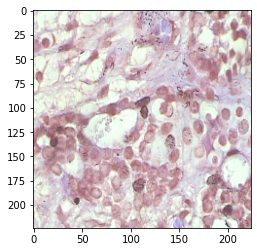

In [ ]:
X = []
Y = []

for label in images_path:
    for image_path in images_path[label]:
        image = cv2.imread(image_path)
        image = cv2.resize(image,(224, 224))
        X.append(image)
        Y.append(images_class[label])

plt.imshow(X[0])
plt.show()

In [ ]:
x = np.array(X)
y = np.array(Y)

pre_trained_models = {}

**MODEL**

In [ ]:
from keras.applications.densenet import DenseNet201
pre_trained_models["DenseNet201"] = DenseNet201(include_top=False, input_shape=(224, 224, 3), pooling="avg")

74850304/74836368 [==============================] - 0s 0us/step


In [ ]:
for layer in pre_trained_models["DenseNet201"].layers:
    layer.trainable = False

split test and train set

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=0)
X_train = pre_trained_models["DenseNet201"].predict(X_train)
X_test = pre_trained_models["DenseNet201"].predict(X_test)

In [ ]:
#Play an audio beep. Any audio URL will do.
from google.colab import output
output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')

**CLASSIFIER**

In [ ]:
Classifier = XGBClassifier(learning_rate = 0.5, n_estiamtors = 250, random_state = 0, gamma = 0, seed = 0)
Classifier.fit(X_train, Y_train)

XGBClassifier(learning_rate=0.5, n_estiamtors=250, seed=0)

In [ ]:
Y_pred = Classifier.predict(X_test)
print(accuracy_score(Y_test, Y_pred))

0.8882783882783882


*Find* The Best Parameter in Classifier

In [ ]:
# lgb.save(Classifier, "/content/drive/MyDrive/Ai_project/LightGBM1.model/")

In [ ]:
# DensNet 201
# 0.9298831385642737 with gpu
# 0.9332220367278798 without gpu

# DenseNet 169
# 0.9232053422370617 without gpu
# 0.9065108514190318 with gpu

# import warnings
# warnings.filterwarnings("ignore")

In [ ]:
# parameters = {
#     'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
#     'random_state': range(0, 10),
#     'n_estimators': [150, 200, 250, 300, 350]
# }
# grid_search = GridSearchCV(estimator = Classifier, param_grid = parameters, scoring = 'accuracy', cv = 5)
# grid_search.fit(X_train, Y_train)

In [ ]:
# best_acc = grid_search.best_score_
# print(best_acc)

In [ ]:
# best_param = grid_search.best_params_
# print(best_param)

**Metrics**

In [ ]:
# print("Accuracy score : ", accuracy_score(Y_test, Y_pred))
# print("mean_squared_error : ", mean_squared_error(Y_test, Y_pred))
# print("r2_score : ", r2_score(Y_test, Y_pred))
# print("f1_score : ", f1_score(Y_test, Y_pred))
# print("precision_score: ", precision_score(Y_test, Y_pred))
# print("recall_score : ", recall_score(Y_test, Y_pred))

**CONFUSION MATRIX**

In [ ]:
# import seaborn as sns
# cm = confusion_matrix(Y_test, Y_pred)
# Cmatrix = sns.heatmap(cm, annot=True)

# figure = Cmatrix.get_figure()    
# figure.savefig('./drive/MyDrive/Datasets/EfficientNetB7_CM.png', dpi=400)

In [ ]:
# !tar -xzvf "/content/drive/MyDrive/BreaKHis_v1.tar.gz" -C "/content/drive/MyDrive/Datasets2/"